<a href="https://colab.research.google.com/github/Amit-Baviskar/Prodigy-InfoTech-Internship-Project-P-/blob/main/Prodigy_DA_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Titanic Dataset Exploratory Data Analysis (EDA) :**

## **Introduction**

The goal of performing Exploratory Data Analysis (EDA) on the Titanic dataset is to achieve the following:

1. **Comprehending the Data**: The initial phase of any data analysis project is to grasp the structure, variables, and interrelationships present in the dataset. EDA provides insights into the dataset, revealing the distribution of various features and highlighting any potential data issues, such as missing or incorrect values.

2. **Data Cleaning**: EDA typically uncovers missing, duplicated, or inconsistent data. This step allows data analysts to clean and preprocess the dataset by handling missing values, correcting errors, and addressing data quality concerns.

3. **Exploring Features**: EDA aids in investigating individual features (columns) and their interconnections with other attributes. This phase helps pinpoint which variables are significant for modeling, which ones need transformation, and which may require further scrutiny.

4. **Uncovering Patterns**: Through data visualization techniques, such as histograms, box plots, and scatter plots, analysts can recognize underlying trends and patterns. For instance, it may become evident that women had a higher survival rate than men, or passengers from higher social classes were more likely to survive.

In essence, EDA is a fundamental step in the data science workflow. It ensures a comprehensive understanding of the dataset, preparing it for subsequent stages of analysis, modeling, or prediction, thereby establishing a solid foundation for making well-informed, data-driven decisions.

## **Problem Statements :**

- Conduct data cleaning and perform exploratory data analysis (EDA) on the Titanic dataset. Investigate the relationships between different variables and uncover any patterns or trends within the data.

# **Dataset Overview:**

- **pclass:** A representation of the passenger's socio-economic status (SES):
  - 1st = Upper class
  - 2nd = Middle class
  - 3rd = Lower class

- **sibsp (# of siblings/spouses aboard):** Defines familial relationships:
  - Sibling = brother, sister, stepbrother, stepsister
  - Spouse = husband, wife (mistresses and fiancés are excluded)

- **parch (# of parents/children aboard):** Specifies family relationships:
  - Parent = mother, father
  - Child = daughter, son, stepdaughter, stepson
  - Some children travelled with a nanny, so their parch value is 0.

- **Embarked:** The port where the passenger boarded the Titanic:
  - C = Cherbourg
  - Q = Queenstown
  - S = Southampton

- **Survival:** Indicates the passenger's survival status:
  - 0 = No
  - 1 = Yes

In [1]:
# importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing dataset
df=pd.read_csv('/content/titianic_EDA(in).csv')

In [3]:
# Checking data
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,32.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
# Copying the data
df_copy=df.copy()

## **Data Cleaning :**

In [5]:
df.info() #Informative Summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [6]:
df.describe()   # Descriptive data

# Age and Fare columns very high maximum values . We have to filter the outliers

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.411765,2.294882,31.045355,0.498854,0.385027,33.295479
std,378.020061,0.492341,0.837836,16.172373,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,41.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,282.000000,8.000000,9.000000,512.329200


In [7]:
df.shape  #rows and columns

(1309, 12)

In [8]:
# Checking for null values in columns
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,1


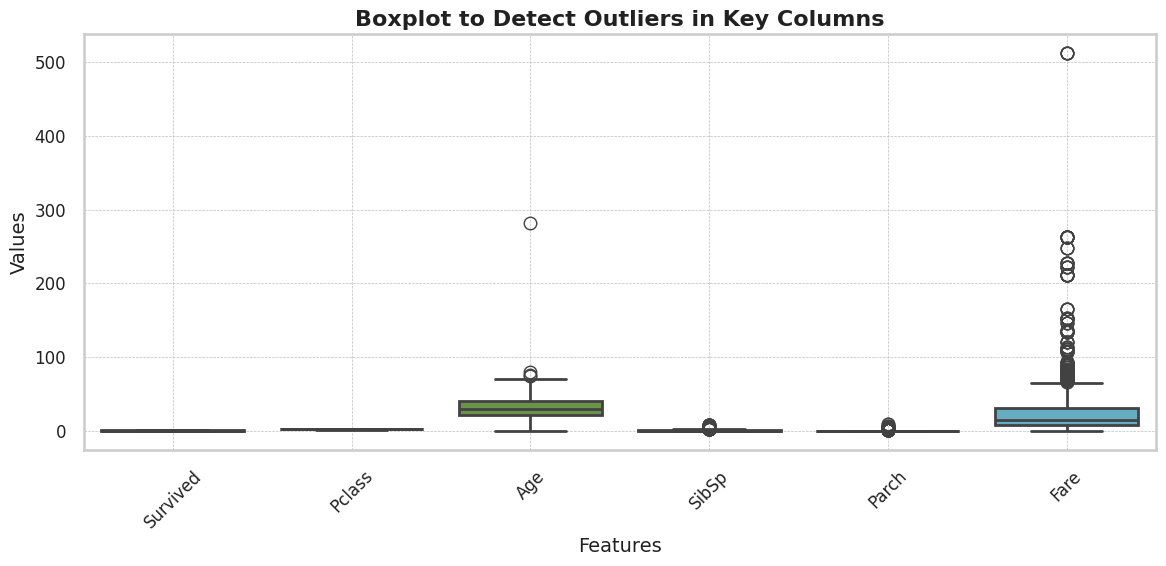

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style and context for a professional look
sns.set_style("whitegrid")
sns.set_context("talk")

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']],
    palette=["#5C9BD1", "#D19A5C", "#67A03C", "#8E6FD2", "#DB4D6D", "#56B4D3"],  # Professional color scheme
    linewidth=2  # Set boxplot line thickness for clarity
)

# Add titles and labels
plt.title("Boxplot to Detect Outliers in Key Columns", fontsize=16, fontweight="bold", color="#212121")
plt.xlabel("Features", fontsize=14, color="#212121")
plt.ylabel("Values", fontsize=14, color="#212121")

# Customize the ticks
plt.xticks(rotation=45, fontsize=12, color="#212121")  # Rotate x-axis labels for better visibility
plt.yticks(fontsize=12, color="#212121")

# Add a grid for readability
plt.grid(color="#BDBDBD", linestyle="--", linewidth=0.5)

# Show the plot
plt.tight_layout()
plt.show()


In [11]:
# IQR Interquartile Range For Age column

Q1_age = df['Age'].quantile(q=0.25)  # Select the 'Age' column
Q3_age = df['Age'].quantile(q=0.75)  # Select the 'Age' column
IQR = Q3_age - Q1_age

print(f"Q1 :{Q1_age}, Q3 :{Q3_age}, IQR : {IQR}")

Q1 :21.0, Q3 :41.0, IQR : 20.0


In [12]:
lower_fence = Q1_age - 1.5 * IQR  # Calculate the lower fence for age
upper_fence = Q3_age + 1.5 * IQR  # Calculate the upper fence for age

print(f"Lower Fence :{lower_fence}, Upper Fence :{upper_fence}")

Lower Fence :-9.0, Upper Fence :71.0


In [13]:
# lower fence for age is -9.0 . So that can be the case to filtering for lower case of age should be above zero.
df_filtered_age = df[(df['Age'] > 0) & (df['Age'] <= upper_fence)]

In [14]:
# numbers of rows and columns (rows,columns)
df_filtered_age.shape

(1305, 12)

In [15]:
# IQR Interquartile Range For Fare Column

Q1_fare = df_filtered_age['Fare'].quantile(q=0.25)  # Select the 'Fare' column
Q3_fare= df_filtered_age['Fare'].quantile(q=0.75)  # Select the 'Fare' column
IQR = Q3_fare - Q1_fare

print(f"Q1 :{Q1_fare}, Q3 :{Q3_fare}, IQR :{IQR}")
lower_fence = Q1_fare - 1.5 * IQR   # Calculate the upper fence for fare
upper_fence = Q3_fare + 1.5 * IQR    # Calculate the upper fence for fare

print(f"Lower Fence :{lower_fence}, Upper Fence :{upper_fence}")

Q1 :7.8958, Q3 :31.275, IQR :23.379199999999997
Lower Fence :-27.172999999999995, Upper Fence :66.34379999999999


In [16]:
# lower fence for fare should be atleast be more than zero. So filtered in that way.
df_filtered = df_filtered_age[(df_filtered_age['Fare'] > 0) & (df_filtered_age['Fare'] <= upper_fence)]

In [17]:
# numbers of rows and columns (rows,columns)
df_filtered.shape

(1118, 12)

In [18]:
df_filtered.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000
mean,653.828265,0.378354,2.474061,29.821064,0.425760,0.334526,18.233545
std,379.226432,0.485194,0.734584,14.101370,0.857501,0.776148,13.759126
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,3.170800
25%,329.250000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,656.000000,0.000000,3.000000,28.000000,0.000000,0.000000,13.000000
75%,981.750000,1.000000,3.000000,40.000000,1.000000,0.000000,26.000000
max,1309.000000,1.000000,3.000000,71.000000,5.000000,6.000000,65.000000


### Key Insights:

1. **Fare Distribution**:  
   - **Average Fare**: 18.23 (Dollars), with a **maximum fare of 65 Dollars** and a **minimum fare of 3.17 Dollars**.  
   - **Fare Range**: The majority of fares range between **7.90 Dollars** (25th percentile) and **26 Dollars** (75th percentile), reflecting a typical fare distribution.

2. **Age Distribution**:  
   - **Average Age**: Approximately **29.8 years**, with ages ranging from **0.17 years (youngest)** to **71 years (oldest)**.  
   - Most passengers were between **21 years** (25th percentile) and **40 years** (75th percentile), indicating a predominantly young to middle-aged group.

3. **Family Presence on Board**:  
   - **SibSp (siblings/spouses)** and **Parch (parents/children)** have relatively low average values (~0.43 and ~0.33), suggesting that most passengers traveled either alone or with very few family members.

4. **Survival Rate**:  
   - The **average survival rate (0.378)** implies a **37.8% survival rate** among the passengers in the dataset.

5. **Ticket Class Distribution**:  
   - The **average Pclass is 2.47**, showing that a significant portion of passengers traveled in **second** and **third class**.

In [ ]:
df_filtered.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [19]:
df_filtered.info() # Shows descriptive infromation

<class 'pandas.core.frame.DataFrame'>
Index: 1118 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1118 non-null   int64  
 1   Survived     1118 non-null   int64  
 2   Pclass       1118 non-null   int64  
 3   Name         1118 non-null   object 
 4   Sex          1118 non-null   object 
 5   Age          1118 non-null   float64
 6   SibSp        1118 non-null   int64  
 7   Parch        1118 non-null   int64  
 8   Ticket       1118 non-null   object 
 9   Fare         1118 non-null   float64
 10  Cabin        156 non-null    object 
 11  Embarked     1118 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 113.5+ KB


## **Data Processing and Engineering :**

In [20]:
df_filtered['Sex'] = df_filtered['Sex'].map({'female': 'Female', 'male': 'Male'})
df_filtered.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",Male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",Female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",Male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",Male,32.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",Male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",Male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",Female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",Female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",Female,4.0,1,1,PP 9549,16.7000,G6,S


In [21]:
df_filtered['Pclass'] = df_filtered['Pclass'].map({1: 'First Class', 2: 'Second Class', 3: 'Third Class'})
df_filtered.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,Third Class,"Braund, Mr. Owen Harris",Male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,Third Class,"Heikkinen, Miss. Laina",Female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,First Class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Female,35.0,1,0,113803,53.1000,C123,S
4,5,0,Third Class,"Allen, Mr. William Henry",Male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,Third Class,"Moran, Mr. James",Male,32.0,0,0,330877,8.4583,NaN,Q
6,7,0,First Class,"McCarthy, Mr. Timothy J",Male,54.0,0,0,17463,51.8625,E46,S
7,8,0,Third Class,"Palsson, Master. Gosta Leonard",Male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,Third Class,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",Female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,Second Class,"Nasser, Mrs. Nicholas (Adele Achem)",Female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,Third Class,"Sandstrom, Miss. Marguerite Rut",Female,4.0,1,1,PP 9549,16.7000,G6,S


In [22]:
df_filtered['Embarked'] = df_filtered['Embarked'].str.strip()
df_filtered['Embarked'] = df_filtered['Embarked'].map({'C': 'Cherbourg', 'Q': 'Queenstown','S':'Southampton'})
df_filtered.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,Third Class,"Braund, Mr. Owen Harris",Male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
2,3,1,Third Class,"Heikkinen, Miss. Laina",Female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton
3,4,1,First Class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Female,35.0,1,0,113803,53.1000,C123,Southampton
4,5,0,Third Class,"Allen, Mr. William Henry",Male,35.0,0,0,373450,8.0500,NaN,Southampton
5,6,0,Third Class,"Moran, Mr. James",Male,32.0,0,0,330877,8.4583,NaN,Queenstown
6,7,0,First Class,"McCarthy, Mr. Timothy J",Male,54.0,0,0,17463,51.8625,E46,Southampton
7,8,0,Third Class,"Palsson, Master. Gosta Leonard",Male,2.0,3,1,349909,21.0750,NaN,Southampton
8,9,1,Third Class,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",Female,27.0,0,2,347742,11.1333,NaN,Southampton
9,10,1,Second Class,"Nasser, Mrs. Nicholas (Adele Achem)",Female,14.0,1,0,237736,30.0708,NaN,Cherbourg
10,11,1,Third Class,"Sandstrom, Miss. Marguerite Rut",Female,4.0,1,1,PP 9549,16.7000,G6,Southampton


In [23]:
# Grouping the Age Group From age column into three equal parts - 'Young', 'Middle-Aged', 'Senior'
df_filtered['Age_Group'] = pd.qcut(df_filtered['Age'], q=3, labels=['Young', 'Middle-Aged', 'Senior'])

df_filtered.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group
0,1,0,Third Class,"Braund, Mr. Owen Harris",Male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton,Young
2,3,1,Third Class,"Heikkinen, Miss. Laina",Female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton,Middle-Aged
3,4,1,First Class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Female,35.0,1,0,113803,53.1000,C123,Southampton,Senior
4,5,0,Third Class,"Allen, Mr. William Henry",Male,35.0,0,0,373450,8.0500,NaN,Southampton,Senior
5,6,0,Third Class,"Moran, Mr. James",Male,32.0,0,0,330877,8.4583,NaN,Queenstown,Middle-Aged
6,7,0,First Class,"McCarthy, Mr. Timothy J",Male,54.0,0,0,17463,51.8625,E46,Southampton,Senior
7,8,0,Third Class,"Palsson, Master. Gosta Leonard",Male,2.0,3,1,349909,21.0750,NaN,Southampton,Young
8,9,1,Third Class,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",Female,27.0,0,2,347742,11.1333,NaN,Southampton,Middle-Aged
9,10,1,Second Class,"Nasser, Mrs. Nicholas (Adele Achem)",Female,14.0,1,0,237736,30.0708,NaN,Cherbourg,Young
10,11,1,Third Class,"Sandstrom, Miss. Marguerite Rut",Female,4.0,1,1,PP 9549,16.7000,G6,Southampton,Young


In [24]:
 # survived map column 0:'No',1:'Yes'

df_filtered['Survived'] = df_filtered['Survived'].map({0: 'No', 1: 'Yes'})
df_filtered.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group
0,1,No,Third Class,"Braund, Mr. Owen Harris",Male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton,Young
2,3,Yes,Third Class,"Heikkinen, Miss. Laina",Female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton,Middle-Aged
3,4,Yes,First Class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Female,35.0,1,0,113803,53.1000,C123,Southampton,Senior
4,5,No,Third Class,"Allen, Mr. William Henry",Male,35.0,0,0,373450,8.0500,NaN,Southampton,Senior
5,6,No,Third Class,"Moran, Mr. James",Male,32.0,0,0,330877,8.4583,NaN,Queenstown,Middle-Aged
6,7,No,First Class,"McCarthy, Mr. Timothy J",Male,54.0,0,0,17463,51.8625,E46,Southampton,Senior
7,8,No,Third Class,"Palsson, Master. Gosta Leonard",Male,2.0,3,1,349909,21.0750,NaN,Southampton,Young
8,9,Yes,Third Class,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",Female,27.0,0,2,347742,11.1333,NaN,Southampton,Middle-Aged
9,10,Yes,Second Class,"Nasser, Mrs. Nicholas (Adele Achem)",Female,14.0,1,0,237736,30.0708,NaN,Cherbourg,Young
10,11,Yes,Third Class,"Sandstrom, Miss. Marguerite Rut",Female,4.0,1,1,PP 9549,16.7000,G6,Southampton,Young


## **Data Exploratory Analysis :**

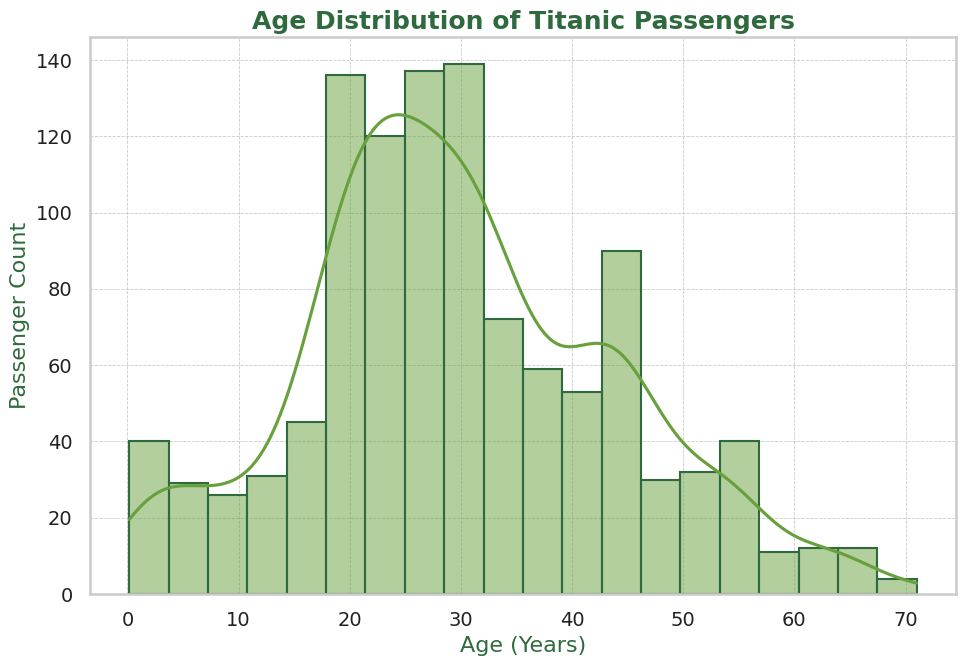

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style and context for presentation
sns.set_style("whitegrid")
sns.set_context("talk")

# Figure size is adjusted for better readability in presentations
plt.figure(figsize=(10, 7))

# Creating a histogram with KDE (Kernel Density Estimate)
sns.histplot(
    df_filtered['Age'],  # Input data
    bins=20,  # Number of bins for the histogram
    kde=True,  # Adds a smooth density line
    color="#67A03C",  # Primary bar color (green)
    edgecolor="#2F6A3E"  # Edge color for bars (dark green)
)

# Adding a clear and professional title
plt.title(
    "Age Distribution of Titanic Passengers",
    fontsize=18, fontweight='bold', color="#2F6A3E"
)

# Labeling axes with appropriate font sizes and colors
plt.xlabel("Age (Years)", fontsize=16, color="#2F6A3E")
plt.ylabel("Passenger Count", fontsize=16, color="#2F6A3E")

# Enhancing tick readability with larger fonts and consistent colors
plt.xticks(fontsize=14, color="#212121")
plt.yticks(fontsize=14, color="#212121")

# Adding a light grid to enhance visual appeal and readability
plt.grid(color="#BDBDBD", linestyle="--", linewidth=0.6, alpha=0.8)

# Adjusting layout for better alignment and spacing
plt.tight_layout()

# Displaying the plot
plt.show()


# **Insights:**

#### 1. **Passenger Age Distribution**:
   - The age distribution is roughly **bell-shaped** with a slight rightward skew.  

   - The majority of passengers are between the ages of **20 and 40**, with a noticeable concentration around **30 years**.  
   
   - There are fewer passengers at the age extremes, with relatively few young children and older adults over 60.

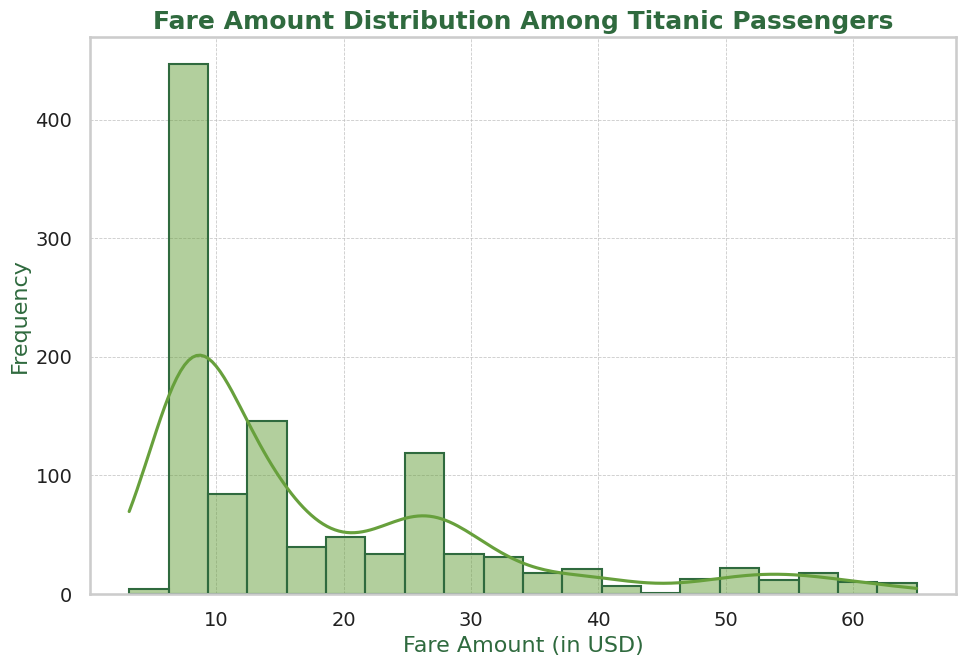

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style and context for a presentation
sns.set_style("whitegrid")
sns.set_context("talk")

# Adjusting figure size for better clarity during presentations
plt.figure(figsize=(10, 7))

# Creating the histogram with KDE
sns.histplot(
    df_filtered['Fare'],  # Data column for Fare
    bins=20,  # Number of bins for the histogram
    kde=True,  # Adds a density line
    color="#67A03C",  # Bar color (green)
    edgecolor="#2F6A3E"  # Bar edge color (dark green)
)

# Adding a title with improved readability
plt.title(
    "Fare Amount Distribution Among Titanic Passengers",
    fontsize=18, fontweight='bold', color="#2F6A3E"
)

# Labeling the axes with clear font sizes and consistent colors
plt.xlabel("Fare Amount (in USD)", fontsize=16, color="#2F6A3E")
plt.ylabel("Frequency", fontsize=16, color="#2F6A3E")

# Enhancing the tick labels for better readability
plt.xticks(fontsize=14, color="#212121")
plt.yticks(fontsize=14, color="#212121")

# Adding a subtle grid for visual guidance
plt.grid(color="#BDBDBD", linestyle="--", linewidth=0.6, alpha=0.8)

# Adjusting layout for a polished presentation appearance
plt.tight_layout()

# Displaying the plot
plt.show()



#### 2. **Distribution of Passenger Fare Amounts**:
   - The fare distribution is **highly right-skewed**, with most fares clustered below **$20**.  
   - Fewer passengers paid higher fares, indicating that expensive tickets were less common.  
   - There is a significant peak around the **lower price range**, suggesting affordable travel was the norm.  

In [28]:
# Numerical Columns List
numerical_column = df_filtered.select_dtypes(include=['int64', 'float64']).columns
numerical_column

Index(['PassengerId', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [29]:
# Categorical Columns List
categorical_column=df.select_dtypes(exclude=['int64','float64']).columns
categorical_column

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [31]:
correlation_matrix = df_filtered[numerical_column].corr() # Calculate the correlation matrix for the numerical columns within the DataFrame
print(correlation_matrix) # Print the correlation matrix

             PassengerId       Age     SibSp     Parch      Fare
PassengerId     1.000000 -0.020427 -0.068249 -0.024119  0.009169
Age            -0.020427  1.000000 -0.277750 -0.184951  0.074780
SibSp          -0.068249 -0.277750  1.000000  0.383050  0.344224
Parch          -0.024119 -0.184951  0.383050  1.000000  0.321621
Fare            0.009169  0.074780  0.344224  0.321621  1.000000


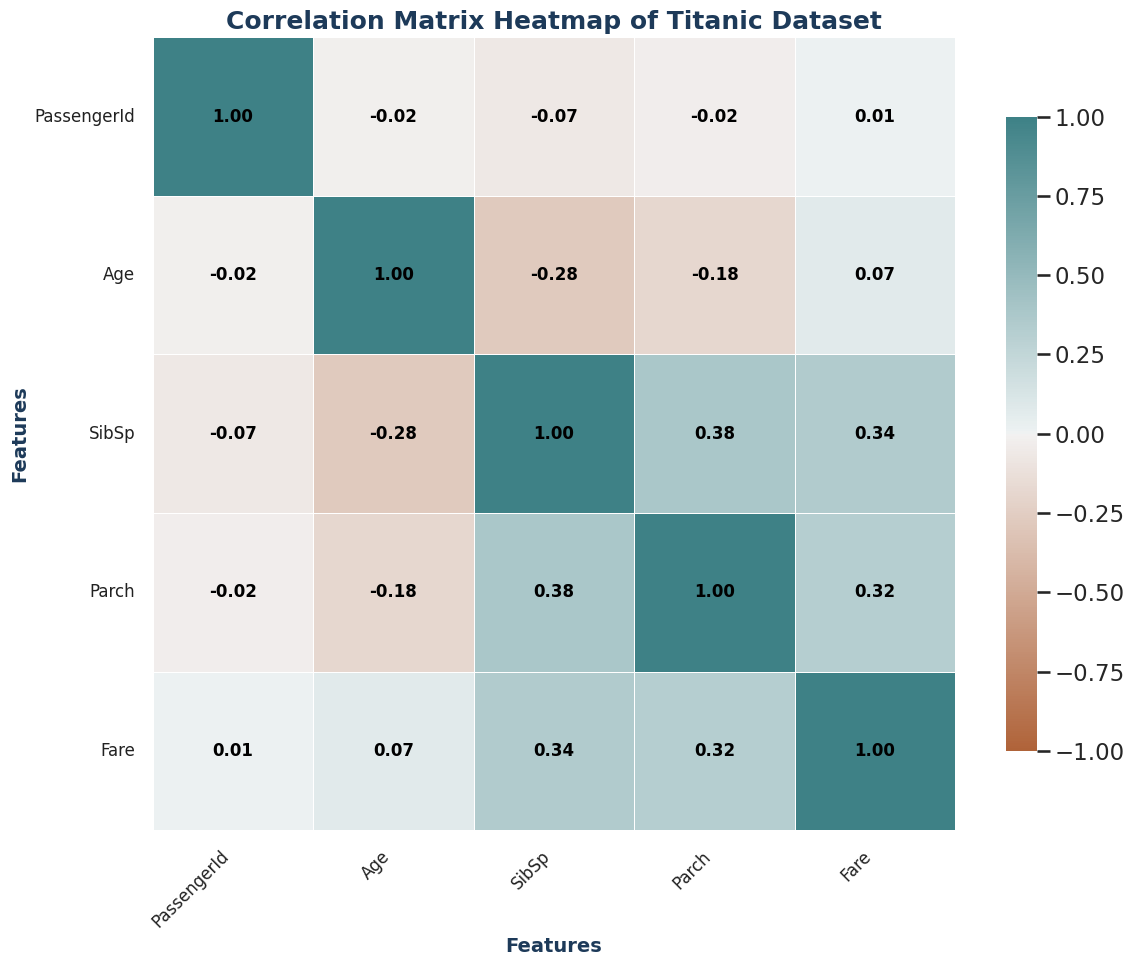

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting the aesthetic style and context for presentation
sns.set_style("whitegrid")
sns.set_context("talk")

# Define a visually appealing color palette for the heatmap
cmap = sns.diverging_palette(30, 200, as_cmap=True)  # Updated color palette for contrast

# Plotting the heatmap with adjustments for clarity and presentation
plt.figure(figsize=(12, 10))  # Increased figure size for better visibility
sns.heatmap(
    correlation_matrix,
    annot=True,  # Display correlation coefficients
    fmt=".2f",  # Format numbers to two decimal places
    cmap=cmap,  # Color map for divergent data
    vmin=-1, vmax=1,  # Correlation values range
    cbar_kws={"shrink": 0.8},  # Adjust color bar size
    linewidths=0.7,  # Gridline thickness for distinction
    annot_kws={"size": 12, "fontweight": "bold", "color": "black"}  # Annotation style
)

# Adding a descriptive title and styling axis labels
plt.title(
    "Correlation Matrix Heatmap of Titanic Dataset",
    fontsize=18, fontweight="bold", color="#1D3A59"  # Changed title color to a darker tone
)
plt.xlabel("Features", fontsize=14, fontweight="bold", color="#1D3A59")  # Changed label color
plt.ylabel("Features", fontsize=14, fontweight="bold", color="#1D3A59")  # Changed label color

# Customizing ticks for better readability
plt.xticks(fontsize=12, rotation=45, ha="right", color="#212121")
plt.yticks(fontsize=12, rotation=0, color="#212121")

# Tight layout for a polished appearance
plt.tight_layout()

# Display the heatmap
plt.show()


### **Insights:**

- There is a moderate positive correlation between **Fare and Survived** (0.132), suggesting that **passengers who paid higher fares were somewhat more likely to survive**, possibly due to being in better cabins or more privileged classes.

- **Fare and Parch** show a positive correlation of 0.322, indicating that **passengers traveling with parents or children generally paid higher fares**, possibly reflecting families opting for higher-class accommodations.

- A negative correlation of **-0.278** between **Age and SibSp** suggests that **younger passengers were more likely to travel with siblings or spouses**, while older passengers were more likely to travel alone.

- The correlation between **Survived and Age** is very low (-0.066), which implies that **age alone had little influence on survival**, with other factors such as gender, class, or family ties being more important.

- **Fare and SibSp** have a positive correlation of **0.344**, indicating that **passengers who traveled with siblings or spouses generally paid higher fares**, perhaps due to families choosing higher-class cabins.

In [ ]:
df_filtered[categorical_column].mode()

,Name,Sex,Ticket,Cabin,Embarked
0,"Connolly, Miss. Kate",Male,1601,G6,Southampton
1,"Kelly, Mr. James",NaN,CA 2144,NaN,NaN


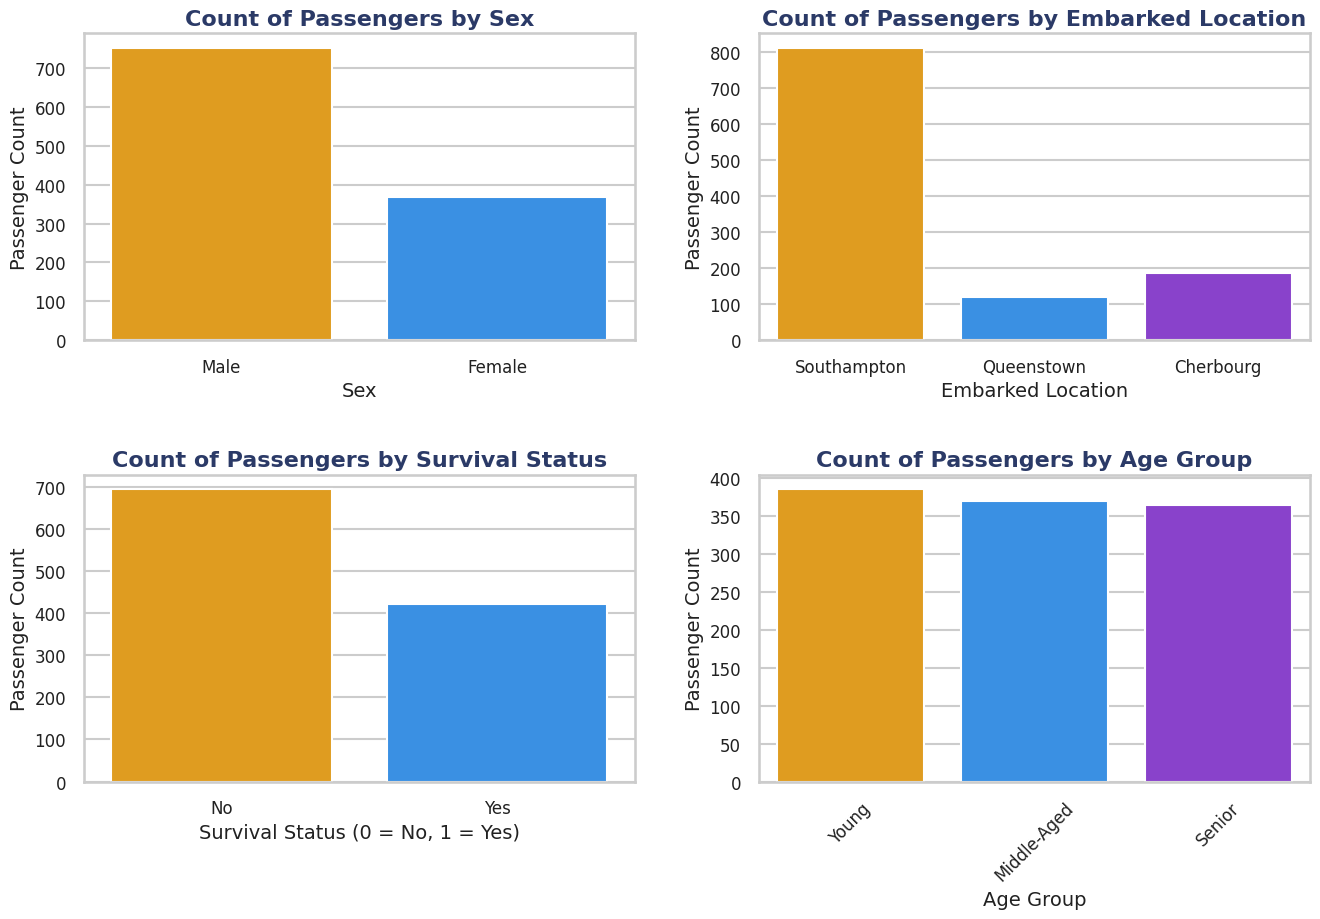

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a custom color palette with Orange, Blue, and Purple
palette = ['#FFA500', '#1E90FF', '#8A2BE2']  # Orange, Blue, Purple

# Create subplots for better visual comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # Slightly larger for better clarity

# Plot 1: Countplot of 'Sex'
sns.countplot(x='Sex', data=df_filtered, ax=axes[0, 0], palette=palette)
axes[0, 0].set_title('Count of Passengers by Sex', fontsize=16, fontweight='bold', color="#2B3A67")
axes[0, 0].set_xlabel("Sex", fontsize=14, color="#212121")
axes[0, 0].set_ylabel("Passenger Count", fontsize=14, color="#212121")
axes[0, 0].tick_params(axis='x', labelsize=12, labelcolor="#212121")
axes[0, 0].tick_params(axis='y', labelsize=12, labelcolor="#212121")

# Plot 2: Countplot of 'Embarked'
sns.countplot(x='Embarked', data=df_filtered, ax=axes[0, 1], palette=palette)
axes[0, 1].set_title('Count of Passengers by Embarked Location', fontsize=16, fontweight='bold', color="#2B3A67")
axes[0, 1].set_xlabel("Embarked Location", fontsize=14, color="#212121")
axes[0, 1].set_ylabel("Passenger Count", fontsize=14, color="#212121")
axes[0, 1].tick_params(axis='x', labelsize=12, labelcolor="#212121")
axes[0, 1].tick_params(axis='y', labelsize=12, labelcolor="#212121")

# Plot 3: Countplot of 'Survived'
sns.countplot(x='Survived', data=df_filtered, ax=axes[1, 0], palette=palette)
axes[1, 0].set_title('Count of Passengers by Survival Status', fontsize=16, fontweight='bold', color="#2B3A67")
axes[1, 0].set_xlabel("Survival Status (0 = No, 1 = Yes)", fontsize=14, color="#212121")
axes[1, 0].set_ylabel("Passenger Count", fontsize=14, color="#212121")
axes[1, 0].tick_params(axis='x', labelsize=12, labelcolor="#212121")
axes[1, 0].tick_params(axis='y', labelsize=12, labelcolor="#212121")

# Plot 4: Countplot of 'Age_Group'
sns.countplot(x='Age_Group', data=df_filtered, ax=axes[1, 1], palette=palette)
axes[1, 1].set_title('Count of Passengers by Age Group', fontsize=16, fontweight='bold', color="#2B3A67")
axes[1, 1].set_xlabel("Age Group", fontsize=14, color="#212121")
axes[1, 1].set_ylabel("Passenger Count", fontsize=14, color="#212121")
axes[1, 1].tick_params(axis='x', labelsize=12, labelcolor="#212121", rotation=45)
axes[1, 1].tick_params(axis='y', labelsize=12, labelcolor="#212121")

# Adjust layout for a clean and balanced appearance
plt.tight_layout(pad=2.0)

# Show the subplots
plt.show()


### Key Observations:

1. **Passenger Gender Breakdown**:
   - The data reveals that the majority of passengers were male, while females constituted a smaller portion of the onboard passengers.

2. **Port of Embarkation**:
   - The highest number of passengers boarded the Titanic at **Southampton**, followed by **Cherbourg** and **Queenstown** as the secondary embarkation points.

3. **Survival Overview**:
   - The dataset indicates that a significant portion of passengers did not survive, with the number of survivors being considerably lower.

4. **Age Group Distribution**:
   - The dataset displays a fairly even spread of passengers across the **Young**, **Middle-Aged**, and **Senior** categories.

## **Using two Numericals/Categoricals columns**

In [ ]:
# Calculate survival counts by sex
survival_by_sex = df_filtered.groupby(['Sex', 'Survived']).size().unstack(fill_value=0)

# Print the results
print("Survival Counts by Sex:")
survival_by_sex

Survival Counts by Sex:


Survived,No,Yes
Sex,,
Female,145,222
Male,550,201


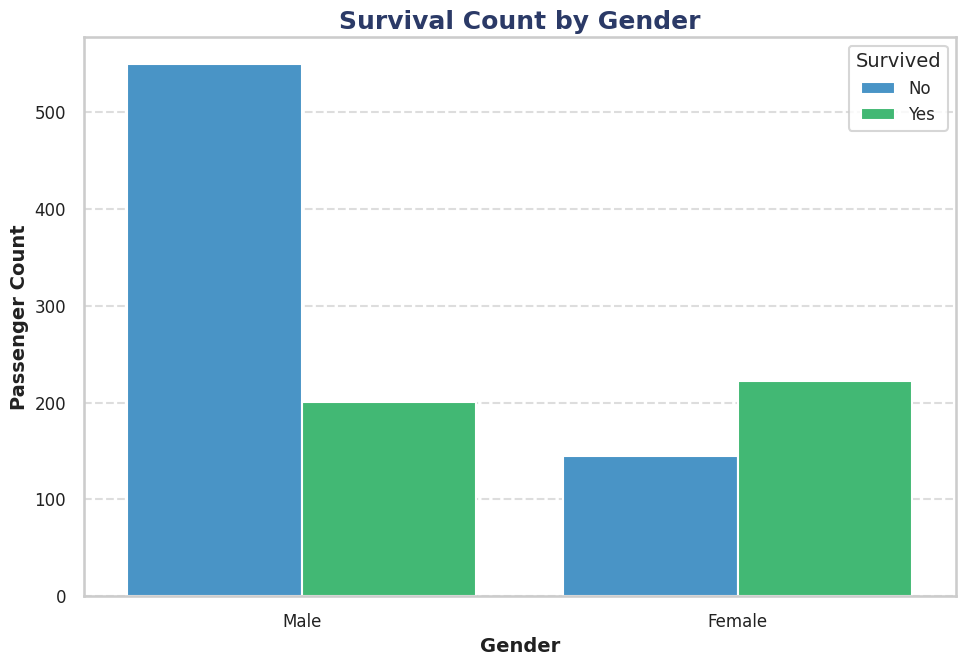

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size for better visibility
plt.figure(figsize=(10, 7))

# Plotting the countplot with a custom color palette
sns.countplot(
    x='Sex', hue='Survived', data=df_filtered,
    palette=["#3498db", "#2ecc71"]  # Blue and Green
)

# Add title and axis labels with professional styling
plt.title('Survival Count by Gender', fontsize=18, fontweight='bold', color="#2B3A67")
plt.xlabel('Gender', fontsize=14, fontweight='bold', color="#212121")
plt.ylabel('Passenger Count', fontsize=14, fontweight='bold', color="#212121")

# Customize tick labels
plt.xticks(fontsize=12, color="#212121")
plt.yticks(fontsize=12, color="#212121")

# Add a legend with custom title
plt.legend(title='Survived', fontsize=12, title_fontsize=14, loc='upper right')

# Add a horizontal grid for readability
plt.grid(axis='y', linestyle='--', alpha=0.5, color="#BDBDBD")

# Adjust layout for a polished presentation
plt.tight_layout()

# Display the plot
plt.show()



### **Insights :**
- **Gender and Survival :**Females had a significantly higher survival count (222) compared to males (201), indicating that gender played a crucial role in survival. This aligns with evacuation protocols prioritizing women.




In [ ]:
# How did survival rates vary across the different classes, and what factors might explain these differences?
df_grouped = df_filtered.groupby(['Survived','Pclass'])['PassengerId'].count()
df_grouped

Survived  Pclass      
No        First Class      84
          Second Class    131
          Third Class     480
Yes       First Class      78
          Second Class    133
          Third Class     212
Name: PassengerId, dtype: int64

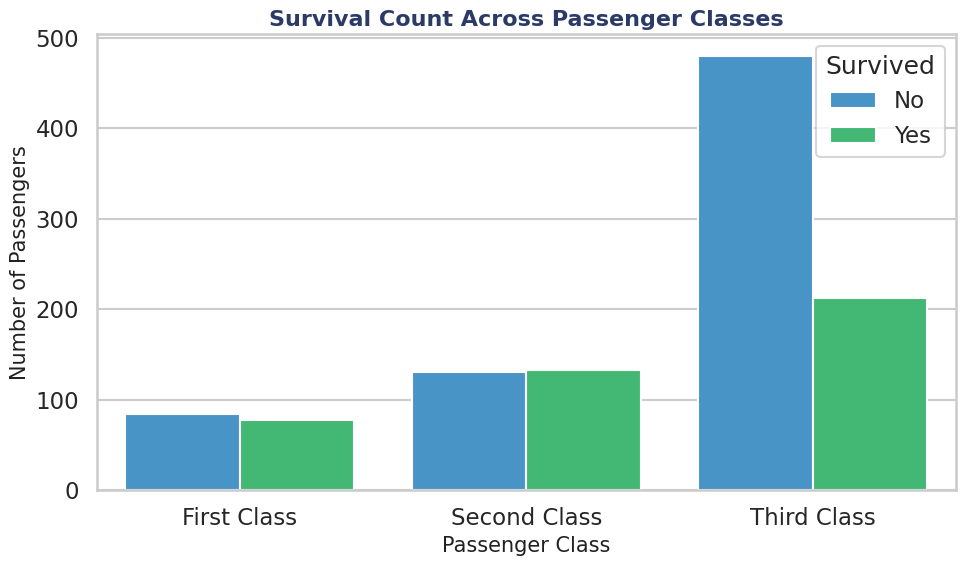

In [37]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=df_filtered, palette=["#3498db", "#2ecc71"], order=['First Class', 'Second Class', 'Third Class'])
plt.title('Survival Count Across Passenger Classes', fontsize=16, fontweight='bold', color="#2B3A67")
plt.xlabel('Passenger Class', fontsize=15, color="#212121")
plt.ylabel('Number of Passengers', fontsize=15, color="#212121")
plt.tight_layout()  # Adjust layout for better fit

# Show the plot
plt.show()


### **Insights :**

- **Survivor Distribution by Class :**First-class had the highest survival rate (78 survivors out of 162 passengers), while third-class had the lowest survival rate (212 survivors out of 692 passengers).

- **Passenger Distribution Across Classes :**Most passengers were in third class (692), followed by second class (264), and then first class (162), highlighting the socioeconomic disparity in the Titanic's passenger demographics.

In [38]:
# How does the survival rate vary across the classes, and does fare play a role in improving survival odds?

fare_data_avg = df_filtered.groupby(['Survived','Pclass'])['Fare'].mean().round(2).unstack().fillna(0)
fare_data_avg

Pclass,First Class,Second Class,Third Class
Survived,,,
No,38.83,18.95,12.38
Yes,40.07,21.58,12.75


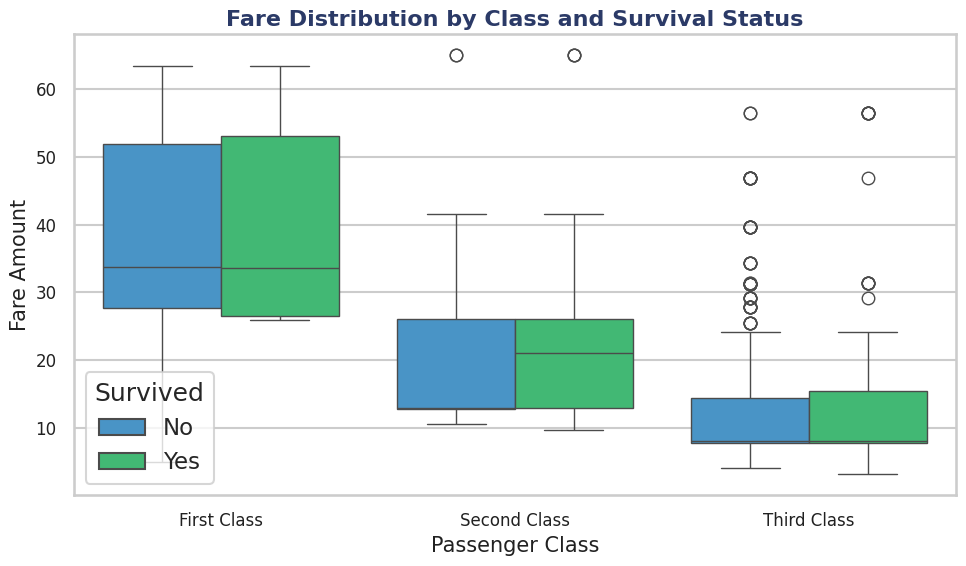

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Pclass', y='Fare', hue='Survived',
    data=df_filtered,  # Use the original DataFrame 'df_filtered'
    palette=["#3498db", "#2ecc71"], order=['First Class', 'Second Class', 'Third Class']
)

# Add chart details
plt.title('Fare Distribution by Class and Survival Status', fontsize=16, fontweight='bold', color="#2B3A67")
plt.xlabel('Passenger Class', fontsize=15, color="#212121")
plt.ylabel('Fare Amount', fontsize=15, color="#212121")

# Customize ticks
plt.xticks(fontsize=12, color="#212121")
plt.yticks(fontsize=12, color="#212121")

# Show the plot
plt.tight_layout()
plt.show()


### **Insights :**

- **Fares Reflect Class Hierarchy :** First-class passengers had the highest average fares, followed by second and third class, for both survivors and non-survivors.

- **Higher Fares Linked to Survival :**Survivors in all classes paid slightly higher fares on average compared to non-survivors, suggesting better survival chances for higher-paying passengers within each class.








In [ ]:
# Is there a significant correlation between the fare amount and survival rate?
df_grouped = df_filtered.groupby(['Survived',"Sex"])['Fare'].mean().round(2)
df_grouped

Survived  Sex   
No        Female    20.51
          Male      15.84
Yes       Female    21.21
          Male      19.86
Name: Fare, dtype: float64

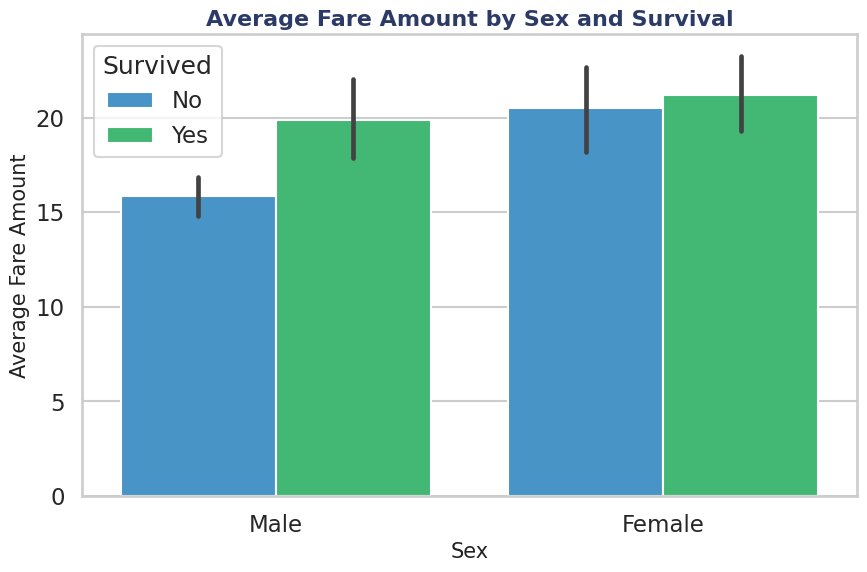

In [40]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Fare', hue='Survived', data=df_filtered, palette=["#3498db", "#2ecc71"])  # Blue and Green palette
plt.title('Average Fare Amount by Sex and Survival', fontsize=16, fontweight='bold', color="#2B3A67")
plt.xlabel('Sex', fontsize=15, color="#212121")
plt.ylabel('Average Fare Amount', fontsize=15, color="#212121")
plt.show()


### **Insights :**

- Higher Fares for Survivors:T**he average fare paid by survivors was higher for both genders** compared to non-survivors. This could indicate a possible link between fare price and survival, suggesting that individuals in higher-paying classes may have had better chances of survival.
Gender-Based Fare Patterns:

- Among non-survivors, f**emales paid higher average fares (20.51) compared to males (15.83)**. Similarly, among survivors, females also paid higher average fares (21.20) than males (19.85). This might indicate that females were more likely to be in higher-paying classes than males.



In [ ]:
# Did survival rates vary significantly between different age groups?
age_group_survival = df_filtered.groupby(['Age_Group', 'Survived']).size().unstack().fillna(0)
age_group_survival

Survived,No,Yes
Age_Group,,
Young,237,148
Middle-Aged,224,145
Senior,234,130


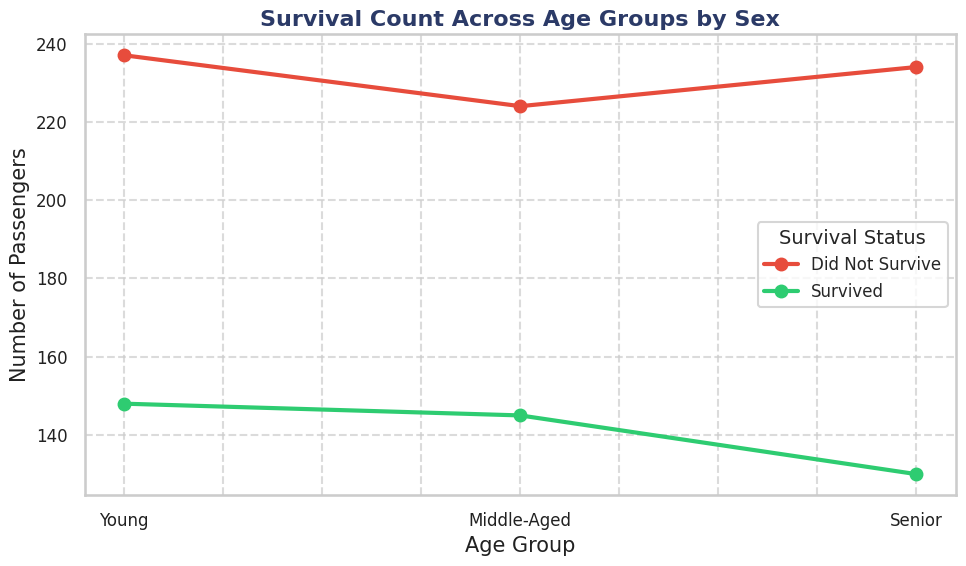

In [41]:
# Aggregate the data for the line chart
age_group_survival = df_filtered.groupby(['Age_Group', 'Survived']).size().unstack().fillna(0)

import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the stacked line chart
plt.figure(figsize=(10, 6))

# Plot each survival status as a separate line
# Access columns using their actual names (e.g., 'No', 'Yes', or 0, 1 if they are numeric)
age_group_survival['No'].plot(kind='line', label='Did Not Survive', color="#e74c3c", marker='o', linewidth=3)  # Red
age_group_survival['Yes'].plot(kind='line', label='Survived', color="#2ecc71", marker='o', linewidth=3)  # Green

# Add chart details
plt.title('Survival Count Across Age Groups by Sex', fontsize=16, fontweight='bold', color="#2B3A67")
plt.xlabel('Age Group', fontsize=15, color="#212121")
plt.ylabel('Number of Passengers', fontsize=15, color="#212121")

# Customize ticks and add grid
plt.xticks(fontsize=12, color="#212121")
plt.yticks(fontsize=12, color="#212121")
plt.grid(True, linestyle='--', alpha=0.7)

# Add a legend
plt.legend(title='Survival Status', fontsize=12, title_fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


### **Insights :**

- **Age Group and Survival:** **Young individuals had a higher survival rate** (148) compared to Middle-Aged (145) and Senior (130) groups. This indicates that younger passengers might have been given priority or had better chances of survival.


- **Age Difference Between Survivors and Non-Survivors:Survivors in all age groups had slightly lower average ages** than non-survivors, particularly noticeable in the Young age group (14.15 years for survivors vs. 16.36 years for non-survivors), suggesting that younger individuals within each group had a survival advantage.







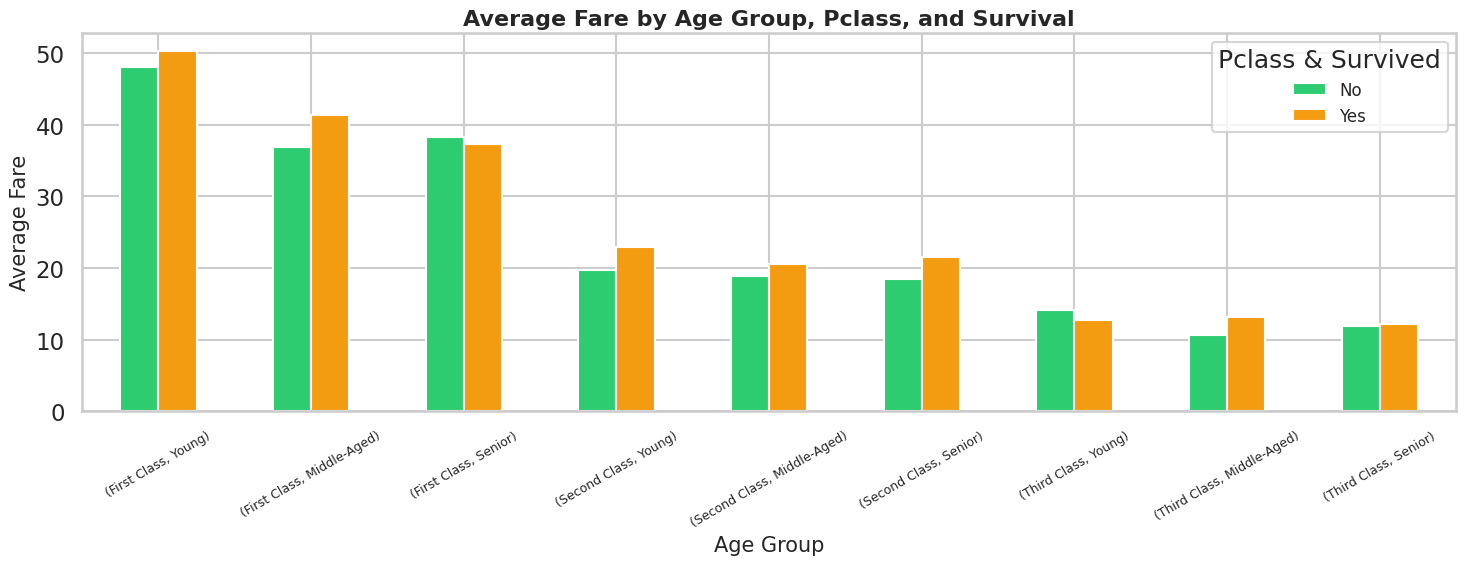

In [42]:
# Are higher fares indicative of better access to lifeboats and evacuation resources?

import matplotlib.pyplot as plt

# Group the data by Pclass, Age_Group, and Survived, and calculate the mean Fare
df_grouped = df_filtered.groupby(['Pclass', 'Age_Group', 'Survived'])['Fare'].mean().unstack()

# Define a new color palette with distinct colors (updated)
color_palette = ['#2ecc71', '#f39c12']  # Green, Yellow

# Plot the bar chart with the new color palette
df_grouped.plot(kind='bar', figsize=(15, 6), color=color_palette)

# Customize the plot
plt.title('Average Fare by Age Group, Pclass, and Survival', fontsize=16, fontweight='bold')
plt.xlabel('Age Group', fontsize=15)
plt.ylabel('Average Fare', fontsize=15)
plt.xticks(rotation=30, fontsize=9)
plt.legend(title='Pclass & Survived', fontsize=12)

# Show the plot
plt.tight_layout()  # Adjust layout for better fit
plt.show()


### **Insights :**

- **SIMILAR TRENDS ACROSS SURVIVORS :** Survivors tend to have paid slightly more on average compared to non-survivors across all classes.
- **SENIOR PASSENGERS :** Seniors in first and second classes show a smaller fare gap between survivors and non-survivors.
- **THIRD CLASS FARES :** The average fare for third-class passengers remains consistent, reflecting the affordability for large groups or families.

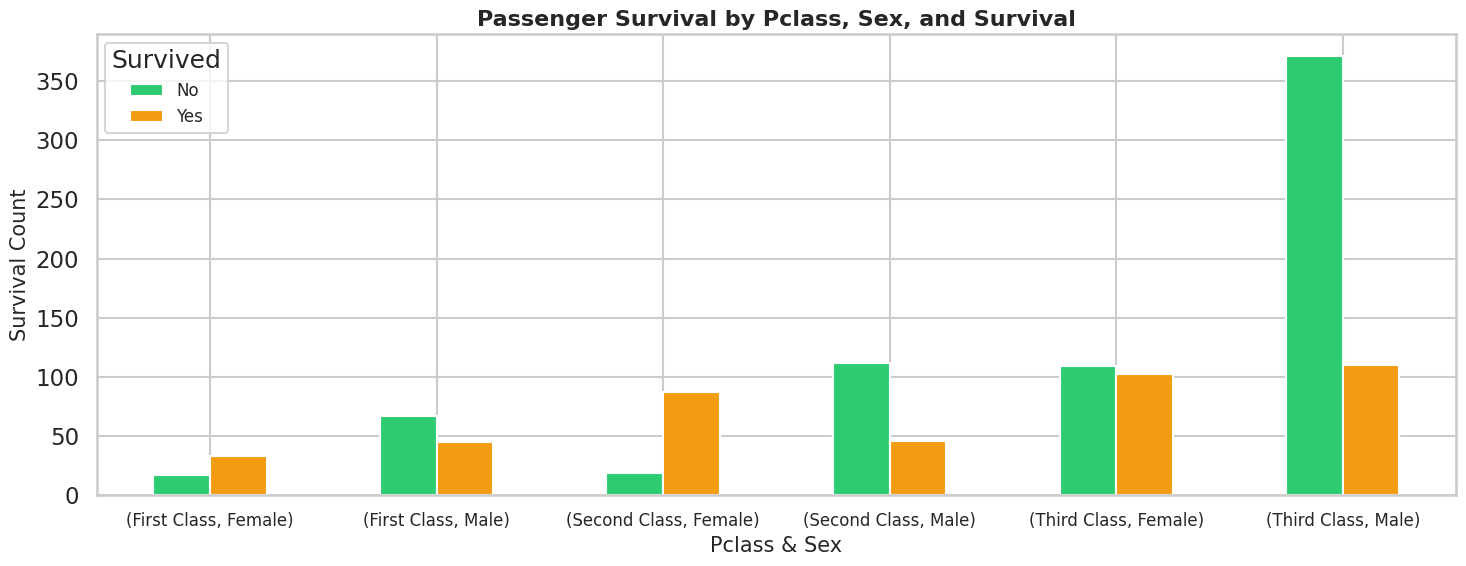

In [43]:
# Does the observed trend indicate a prioritization of women during the evacuation process?

import matplotlib.pyplot as plt

# Group the data by Pclass, Sex, and Survived, and count the number of passengers
df_grouped = df_filtered.groupby(['Pclass', 'Sex', 'Survived'])['PassengerId'].count().unstack()

# Define the color palette as per your preferred colors (updated)
color_palette = ['#2ecc71', '#f39c12']  # Green and Yellow

# Plot the bar chart with the survival count for each group, applying the color palette
df_grouped.plot(kind='bar', figsize=(15, 6), color=color_palette)

# Customize the plot with correct labels and title
plt.title('Passenger Survival by Pclass, Sex, and Survival', fontsize=16, fontweight='bold')
plt.xlabel('Pclass & Sex', fontsize=15)
plt.ylabel('Survival Count', fontsize=15)
plt.xticks(rotation=0, fontsize=12)
plt.legend(title='Survived', fontsize=12)

# Adjust layout for better fit
plt.tight_layout()

# Show the plot
plt.show()


## **Insights :**

- **GENDER IMPACT ON SURVIVAL :** Females across all classes had a higher survival rate compared to males (orange bars taller for females).
- **CLASS VARIATION :** The survival rate is the highest in first class for both genders, with the disparity reducing in lower classes.
- **THIRD CLASS MALES AT HIGH RISK :** Males in third class had a disproportionately high mortality rate.


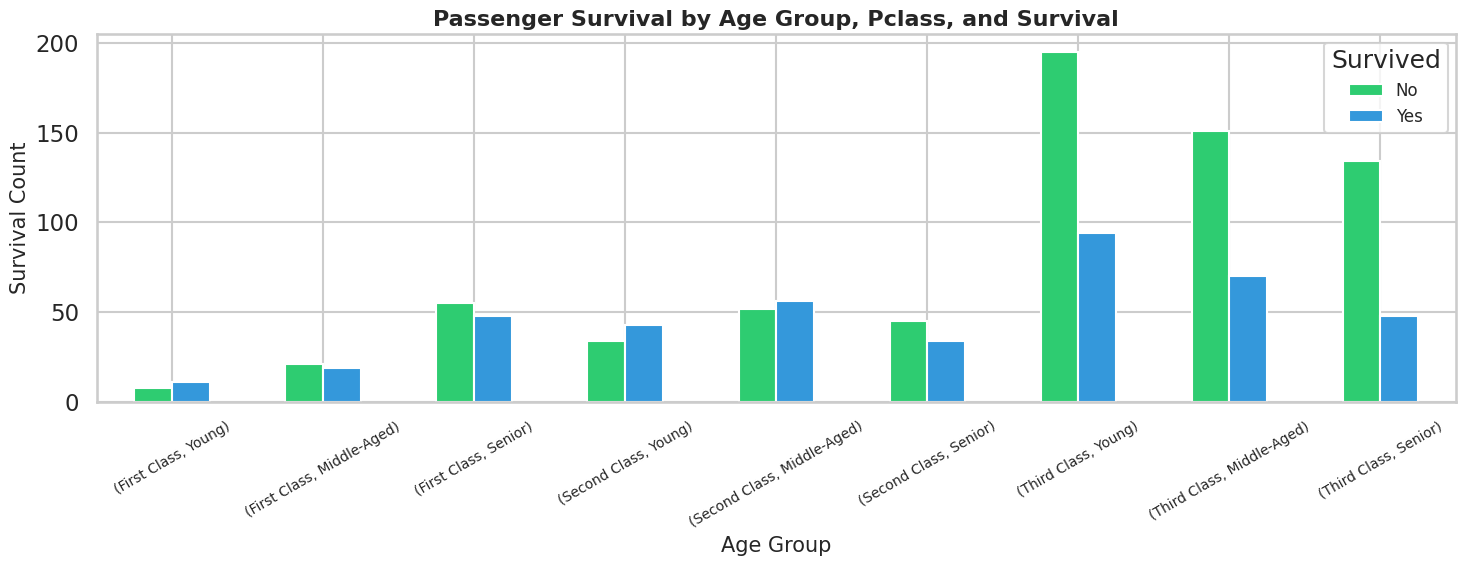

In [44]:
import matplotlib.pyplot as plt

# Group the data by Pclass, Age_Group, and Survived, and count the number of passengers
df_grouped = df_filtered.groupby(['Pclass', 'Age_Group', 'Survived'])['PassengerId'].count().unstack()

# Define the new color palette (e.g., light green and dark blue)
color_palette = ['#2ecc71', '#3498db']  # Green and Blue

# Plot the bar chart with the survival count for each group
df_grouped.plot(kind='bar', figsize=(15, 6), color=color_palette)

# Customize the plot with correct labels and title
plt.title('Passenger Survival by Age Group, Pclass, and Survival', fontsize=16, fontweight='bold')
plt.xlabel('Age Group', fontsize=15)
plt.ylabel('Survival Count', fontsize=15)
plt.xticks(rotation=30, fontsize=10)
plt.legend(title='Survived', fontsize=12)

# Adjust layout for better fit
plt.tight_layout()

# Show the plot
plt.show()


## **Insights :**

- **PREMIUM FARES IN FIRST CLASS:** Passengers traveling in first class consistently paid the highest fares, irrespective of their age group or survival outcome.
- **AGE-BASED FARE VARIATION:** Younger passengers in first class tend to have slightly lower average fares compared to older passengers.
- **SECOND VS. THIRD CLASS FARE COMPARISON:** Fares in second class are relatively higher than third class, but still moderate; third-class fares show less variation across age groups.
- **SURVIVAL PATTERN:** Survivors (depicted by orange bars) generally paid higher fares in first and second class when compared to non-survivors.

## **Final Insights:**

- **Socioeconomic Status and Survival:** Passengers in first class had the highest survival rates (48%), followed by second class (50%), and third class (30%). Higher fares likely provided better access to lifeboats and safety measures.
- **Gender-Based Survival Differences:** Women had a significantly higher survival rate than men across all classes, reinforcing the "women and children first" evacuation policy. Males in third class faced the highest mortality rates.
- **Age and Survival:** Younger passengers, particularly children, exhibited higher survival rates compared to middle-aged and senior passengers. Survivors tended to be slightly younger than those who perished.
- **Fare as a Factor in Survival:** Survivors generally paid higher fares, suggesting that access to safer cabins and proximity to lifeboats played a role in survival chances.
- **Class Disparities:** Third-class passengers represented the majority of fatalities (480 non-survivors), underscoring the significant survival gap based on class.

## **Recommendations:**

- **Equitable Evacuation Procedures:** Future maritime safety measures should focus on providing equal access to lifeboats and resources for all passengers, regardless of socioeconomic status.
- **Inclusive Ship Design:** Ship layouts should be optimized to ensure balanced lifeboat placement and clear evacuation routes to reduce class-based survival inequalities.
- **Comprehensive Emergency Training:** Both crew members and passengers should undergo training that emphasizes effective, unbiased evacuation protocols during emergencies.
- **Data-Driven Safety Enhancements:** Historical data, such as that from the Titanic, should be leveraged to improve modern safety strategies and resource allocation in emergency situations.

## **Conclusion:**

The Titanic disaster stands as a stark reminder of how factors like socioeconomic status, gender, and age can influence survival chances during a catastrophe. The observed survival trends—where first-class passengers and women had clear advantages, while third-class passengers, especially men, faced significantly higher mortality—highlight profound inequalities in access to lifesaving resources. Socioeconomic status, linked to class, had a decisive impact on survival, with wealthier passengers enjoying better access to lifeboats and other safety measures. Gender disparities were evident, with women and children surviving at higher rates, and age also played a role, as younger individuals had higher survival rates compared to their older counterparts.

This analysis calls for a reevaluation of evacuation policies to ensure equal access to safety measures for all individuals, regardless of their class, gender, or age. Reworking ship designs to ensure balanced lifeboat distribution and streamlined evacuation routes is essential to mitigating these disparities. Additionally, the adoption of impartial and thorough emergency response training for both crew members and passengers is vital to ensuring that evacuation procedures are fair and efficient during any emergency.

In conclusion, the Titanic tragedy underscores the importance of learning from the past to inform and improve modern safety practices. By utilizing data from past disasters, we can build more inclusive, effective safety protocols for contemporary transportation systems, guaranteeing that no one is left behind during critical moments of crisis.